In [5]:
import sys
sys.path.append('C:\Anaconda3\Lib\site-packages') # Link to my local libraries
# import warnings
# warnings.filterwarnings('ignore')
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline
sys.version

'3.5.1 |Continuum Analytics, Inc.| (default, Jan 29 2016, 15:01:46) [MSC v.1900 64 bit (AMD64)]'

Author: Alex Galea   
Date: September, 2016

## MoviePy Tutorial

MoviePy can be installed with

`pip install moviepy`

To easily check if the package is already installed or has installed properly, boot up the python interpreter and try to import it.

Description of MoviePy (from the website):

A Python module for video editing, which can be used for basic operations (like cuts, concatenations, title insertions), video compositing (a.k.a. non-linear editing), video processing, or to create advanced effects. It can read and write the most common video formats, including GIF.

![](http://zulko.github.io/moviepy/_images/explanations.jpeg)

I set up a folder named `source_videos` and put my video files in there. We will use:

In [6]:
os.listdir('source_files')

['face-time-lapse.mp4',
 'snowboarding.mp4',
 'song-Aguas-Calientes.mp3',
 'watermark-image.jpg']

Download links for videos:
 - Low-resolution snowboard video: https://vimeo.com/159174585

In this tutorial we will see:
 - video to gif conversion
 - adding watermarks to files
 - adding audio to a combination of files

In [7]:
from moviepy import editor

  warn(skimage_deprecation('The `skimage.filter` module has been renamed '



![](modules.png)

### The clip object: datatypes, attributes

In [ ]:
clip = editor.VideoFileClip('source_files/face-time-lapse.mp4')

In [ ]:
# How big each frame in pixels?
frame_size = clip.get_frame(0).shape
frame_size

In [ ]:
# Frames per second
clip.fps

In [ ]:
# How long is it
print('%.1f seconds' % clip.duration)

In [ ]:
t = 1.0; print('frame from t=%.2f seconds:' % t)
frame = clip.get_frame(t)
plt.imshow(frame)
plt.show()

t = 6.04; print('frame from t=%.2f seconds:' % t)
frame = clip.get_frame(t)
plt.imshow(frame)
plt.show();

In [ ]:
# If you have pygame installed you should
# be able to do (but my system crashes):
clip.preview(fps=30, audio=False)

### Convert video to gif

In [ ]:
def resize_frac(desired_length, what, clip):
    '''
    Get the fraction needed to resize the clip
    to a given width or height.
    
    desired_length:
        Number of pixels
        
    what:
        'height' or 'width'
    '''

    if what == 'width':
        result = desired_length / clip.get_frame(0).shape[1]

    elif what == 'height':
        result = desired_length / clip.get_frame(0).shape[0]

    return result

In [ ]:
# Load full resolution video
clip = editor.VideoFileClip('source_files/face-time-lapse.mp4')

In [ ]:
frac = resize_frac(600, 'width', clip)
frac

In [ ]:
# Resize and save gif
clip.resize(frac)\
    .write_gif('output_files/face-time-lapse-lowres.gif')

In [ ]:
# Cut out a piece, resize, speed up and save to gif
clip = editor.VideoFileClip('source_files/snowboarding.mp4')
clip.subclip((2, 17.0), (2, 31.0))\
    .resize(resize_frac(400, 'height', clip))\
    .speedx(2)\
    .write_gif('output_files/snowboarding-bail-lowres.gif',
               fps=30, verbose=False)

### Add audio and export .mp4

In [ ]:
video = editor.VideoFileClip('source_files/face-time-lapse.mp4')
audio = editor.AudioFileClip('source_files/song-Aguas-Calientes.mp3')

In [ ]:
# Export 
t0 = 82 # audio clip start in seconds
video_time = video.end
video.set_audio(audio.subclip(t0, t0+video_time))\
     .write_videofile('output_files/face-time-lapse-audio.mp4')

__The video is stored frame for frame in pixel matrices for RGB. How is the audio being stored?__

In [ ]:
audio.get_frame(1) # get audio clip value at given time in seconds

In [ ]:
frames = np.array([audio.get_frame(float(i))
                   for i in range(int(a_clip.end))])
plt.hist(frames.T[0], bins=100, alpha=0.4, label='left sterio')
plt.hist(frames.T[1], bins=100, alpha=0.4, label='right sterio')
plt.legend();

### Adding a watermark to a batch of files

In [8]:
clip = editor.VideoFileClip('source_files/snowboarding.mp4')

  self.nchannels))



In [13]:
# Save a bunch of sample cilps to process
delta_t = [(16.0, 20.0), (35.0, 39.0), (58.0, 62.0),
           (79.0, 83.0), (85.0, 90.0), (96.0, 101.0),
           (113, 116), (123.0, 127.0)]

for i, t in enumerate(delta_t):
    clip.subclip(t[0], t[1])\
        .resize(0.5)\
        .write_videofile('output_files/batch/snowboard-%02d.mp4' % i,
                         fps=30, audio=False, verbose=False)

 99%|███████████████████████████████████████████████████████████████████████████████▎| 120/121 [00:02<00:00, 56.95it/s]


In [20]:
import glob
glob.glob('output_files/batch/*.mp4')

['output_files/batch\\snowboard-00.mp4',
 'output_files/batch\\snowboard-01.mp4',
 'output_files/batch\\snowboard-02.mp4',
 'output_files/batch\\snowboard-03.mp4',
 'output_files/batch\\snowboard-04.mp4',
 'output_files/batch\\snowboard-05.mp4',
 'output_files/batch\\snowboard-06.mp4',
 'output_files/batch\\snowboard-07.mp4']

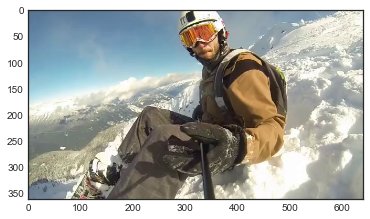

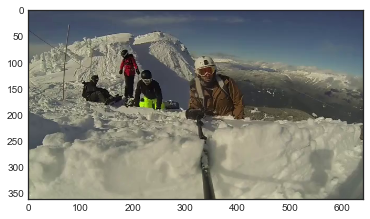

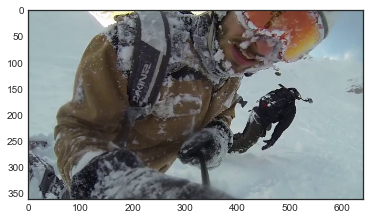

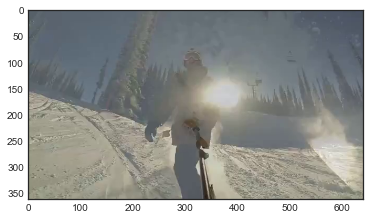

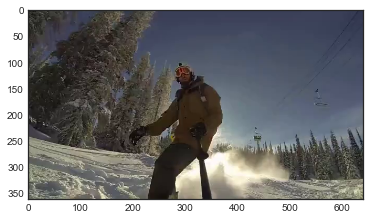

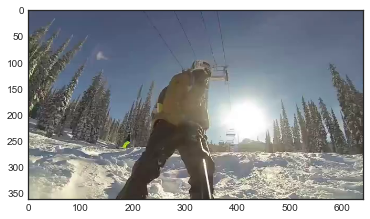

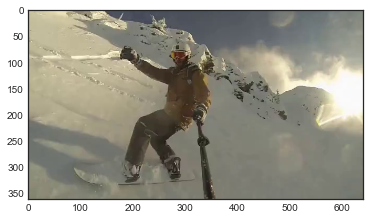

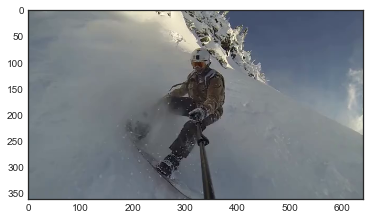

In [22]:
for file in glob.glob('output_files/batch/*.mp4'):
    video = editor.VideoFileClip(file)
    plt.imshow(video.get_frame(0))
    plt.show()

In [42]:
image = editor.ImageClip('source_files/watermark-image.jpg')
folder = 'output_files/batch/'
for file in glob.glob(folder+'*.mp4'):
    video = editor.VideoFileClip(file)
    img = image.resize(0.1)\
               .set_duration(video.duration)\
               .set_opacity(0.5)\
               .set_position((30, 30))
    clip = editor.CompositeVideoClip([video, img])
    filename = file.split('\\')[1]
    clip.write_videofile('output_files/batch/watermarked/'+filename,
                         fps=30, audio=False, verbose=False)

 99%|██████████████████████████████████████████████████████████████████████████████▎| 120/121 [00:00<00:00, 158.09it/s]
